In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import scipy

In [4]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.11.0
Num GPUs Available:  0


In [43]:
IMAGE_SIZE = 256

In [144]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    'Training',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 64,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'Validation',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Testing',
    shuffle = True,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [145]:
classes = train_generator.class_indices
classes

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [146]:
classes1 = validation_generator.class_indices
classes1

{'Early_Blight': 0, 'Healthy': 1, 'Late_Blight': 2}

In [147]:
len(train_generator)

51

In [148]:
len(validation_generator)

13

In [116]:
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 256, 256, 3)
(128, 3)


In [117]:
for image_batch, labels_batch in validation_generator:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32, 3)


In [149]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,3)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 256*256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The sixth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 3 output neuron. 
    tf.keras.layers.Dense(3, activation='softmax')
])

In [150]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 30, 30, 64)     

In [153]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [154]:
EPOCHS = 50

history = model.fit(
      train_generator,
      steps_per_epoch = 10,  
      epochs = EPOCHS,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = 10
)

Epoch 1/50
10/10 [==============================] - 14s 1s/step - loss: 0.4433 - accuracy: 0.8438 - val_loss: 0.2780 - val_accuracy: 0.9000
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 0.3517 - accuracy: 0.8820 - val_loss: 0.2644 - val_accuracy: 0.9031
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 0.3807 - accuracy: 0.8406 - val_loss: 0.2872 - val_accuracy: 0.8906
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 0.3433 - accuracy: 0.8813 - val_loss: 0.2963 - val_accuracy: 0.9031
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 0.3530 - accuracy: 0.8692 - val_loss: 0.2996 - val_accuracy: 0.8875
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 0.3533 - accuracy: 0.8750 - val_loss: 0.3064 - val_accuracy: 0.8938
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 0.3111 - accuracy: 0.8804 - val_loss: 0.3490 - val_accuracy: 0.8562
Epoch 8/50
10/10 [==

In [155]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

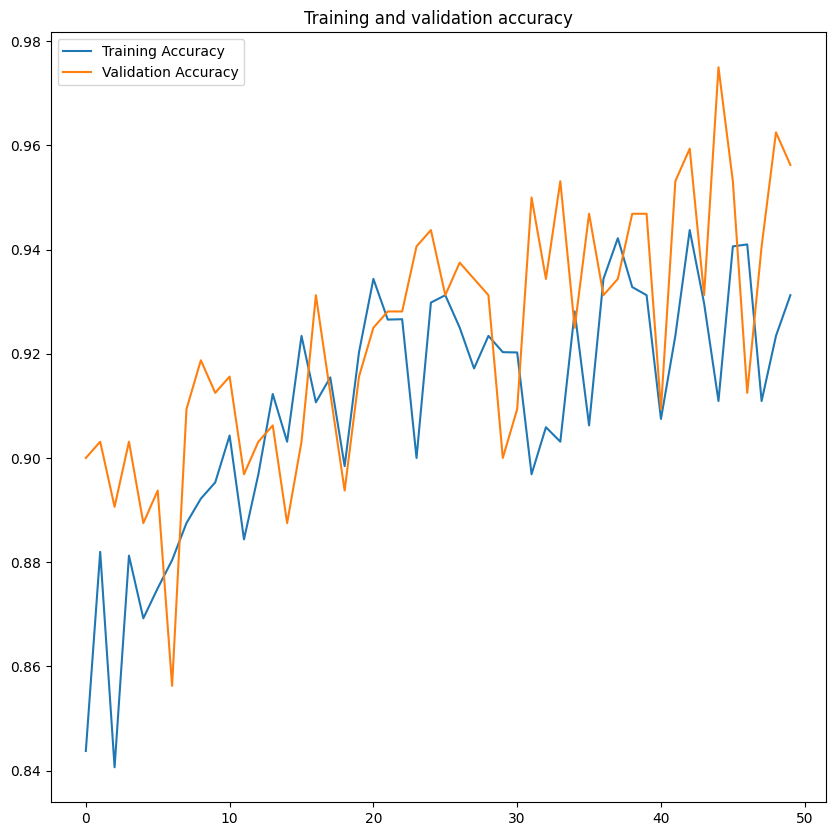

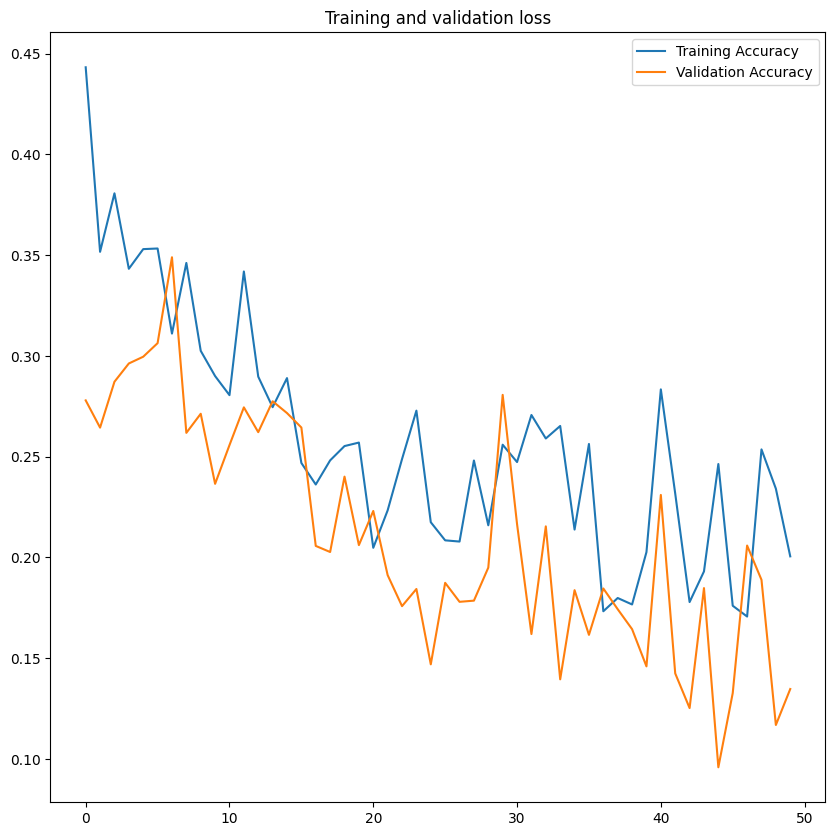

In [156]:
plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend()
plt.title("Training and validation accuracy")

plt.figure(figsize=(10,10))
plt.plot(range(EPOCHS),loss,label="Training Accuracy")
plt.plot(range(EPOCHS),val_loss,label="Validation Accuracy")
plt.legend()
plt.title("Training and validation loss")

In [161]:
test_dataset = tf.keras.utils.image_dataset_from_directory("Testing",
                                                     shuffle=True,
                                                     batch_size = 32,
                                                     image_size = (IMAGE_SIZE,IMAGE_SIZE))

Found 405 files belonging to 3 classes.


In [162]:
classes = test_dataset.class_names
classes

['Early_Blight', 'Healthy', 'Late_Blight']

In [163]:
scores = model.evaluate(test_generator)

13/13 [==============================] - 1s 104ms/step - loss: 0.1401 - accuracy: 0.9481


In [164]:
def predict(model,img):
    image = tf.keras.utils.img_to_array(img)
    image = tf.expand_dims(image,0)
    
    pred = model.predict(image)
    pred_class = classes[np.argmax(pred[0])]
    confidence = round(100 * (np.max(pred[0])),2)
    return pred_class,confidence

In [165]:
import numpy as np

1/1 [==============================] - 0s 25ms/step


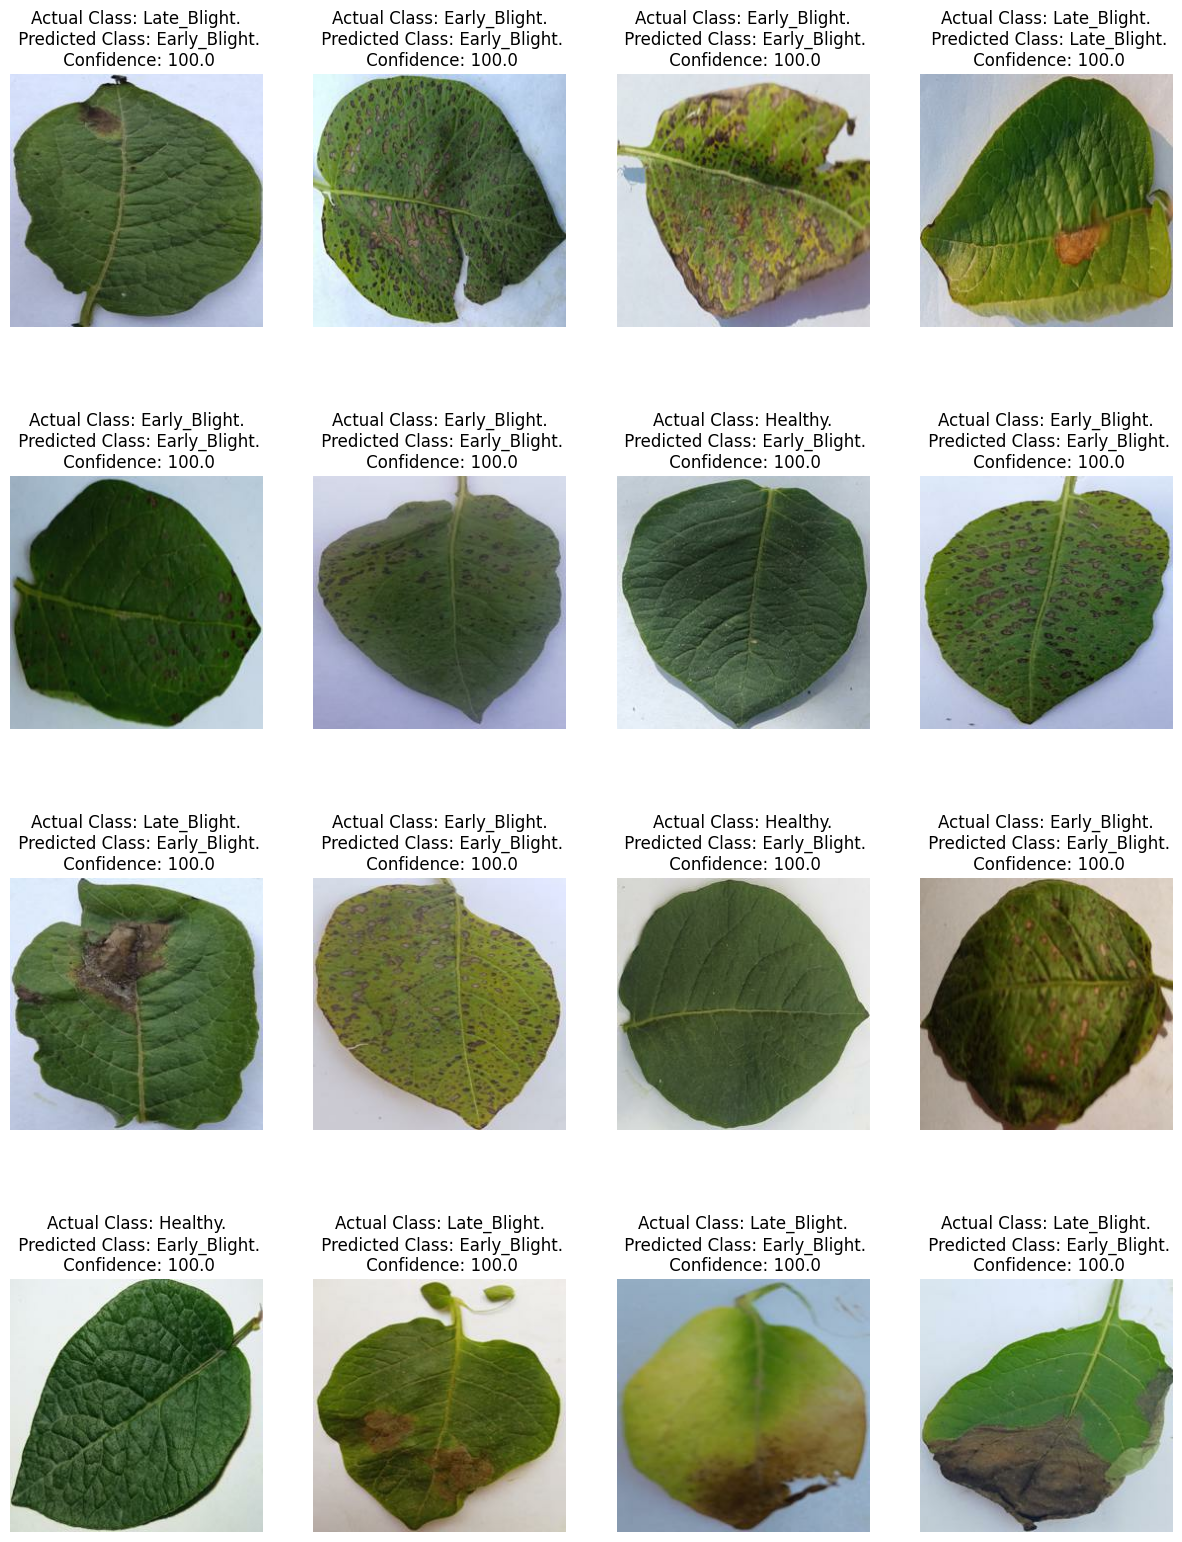

In [168]:
plt.figure(figsize=(15,20))
for image_batch,label_batch in test_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        pred_class,confidence = predict(model,image_batch[i].numpy());
        actual_class = classes[label_batch[i]]
        plt.title(f"Actual Class: {actual_class}.\n Predicted Class: {pred_class}.\n Confidence: {confidence}")
        plt.axis("off")

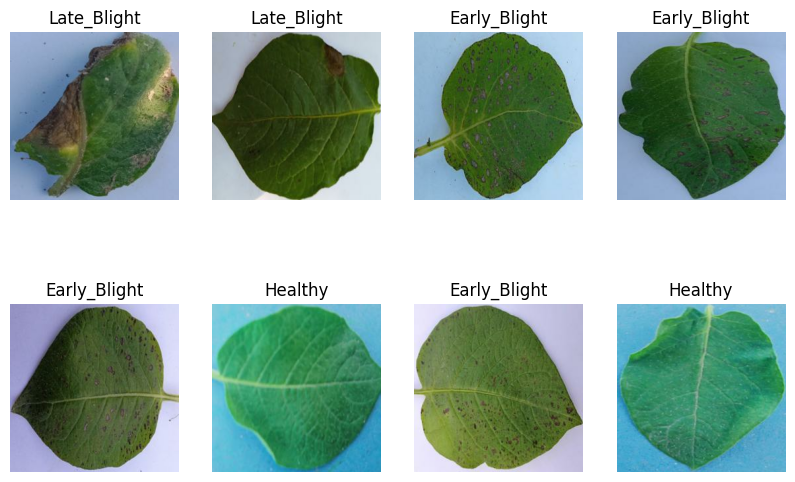

In [84]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in test_dataset.take(1):
    for i in range(0,8):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(classes[label_batch[i]])
        plt.axis("off")

In [169]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\FRANDA~1\AppData\Local\Temp\tmpnzsommdn\assets


INFO:tensorflow:Assets written to: C:\Users\FRANDA~1\AppData\Local\Temp\tmpnzsommdn\assets


In [170]:
export_dir = 'saved_model_new'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model_new\assets


INFO:tensorflow:Assets written to: saved_model_new\assets


In [175]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model.
with open('model3.tflite', 'wb') as f:
    f.write(tflite_model)

In [171]:
TF_MODEL_FILE_PATH = 'model2.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [172]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['conv2d_105_input'], 'outputs': ['dense_41']}}

In [173]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_105 (MaxPooli  (None, 127, 127, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_106 (Conv2D)         (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_106 (MaxPooli  (None, 62, 62, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_107 (Conv2D)         (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_107 (MaxPooli  (None, 30, 30, 64)     

In [176]:
model.save("saved_model.h5")